# City blocks layer generating

In [5]:
import os
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32637
# path to data
example_data_path = "./data/spb"

## Input data fetch and parameters setting

In [6]:
from blocksnet import BlocksGenerator

territory = gpd.read_file(os.path.join(example_data_path, "territory_spb.geojson")).to_crs(local_crs)
water = gpd.read_file(os.path.join(example_data_path, "water_spb.geojson")).to_crs(local_crs)
roads = gpd.read_file(os.path.join(example_data_path, "roads_spb.geojson")).to_crs(local_crs)
railways = gpd.read_file(os.path.join(example_data_path, "railways_spb.geojson")).to_crs(local_crs)

bg = BlocksGenerator(territory=territory, water=water, roads=roads, railways=railways)

In [7]:
blocks = bg.generate_blocks()

GENERATING BLOCKS
Setting up enclosures...
Filling holes...
Dropping overlapping blocks...
Calculating blocks area...
Blocks generated.



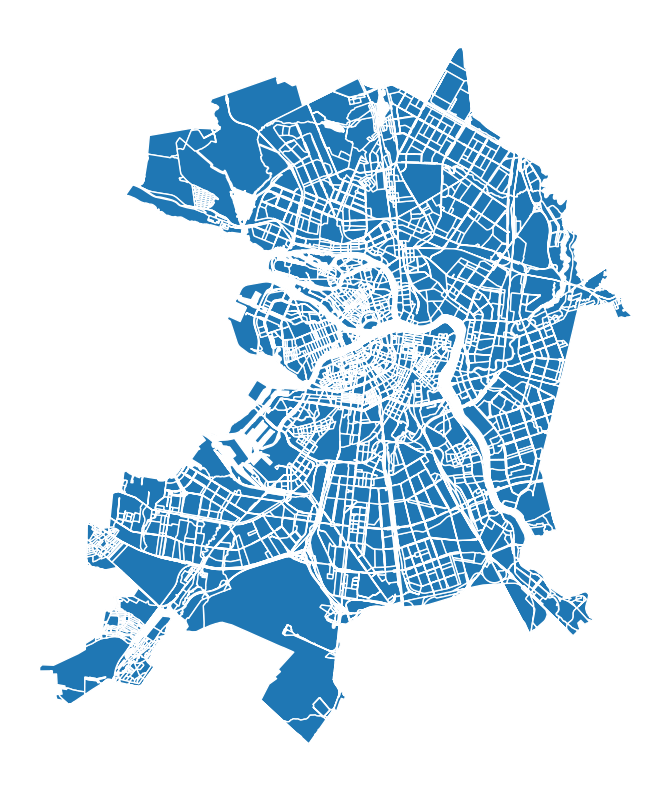

In [8]:
blocks.plot(figsize=[10,10]).set_axis_off()

In [9]:
from blocksnet.preprocessing import LandUseProcessor

zones = gpd.read_file(os.path.join(example_data_path, "pzz.geojson")).to_crs(local_crs)
lup = LandUseProcessor(blocks=blocks, zones=zones)

In [11]:
blocks = lup.get_blocks()

Save the result for the next example

In [12]:
blocks.head()

,geometry,land_use_1,land_use_2,land_use_3
0,"POLYGON ((21234.410 6676652.978, 21237.604 667...",TRANSPORT,NaN,NaN
1,"POLYGON ((21245.938 6676649.579, 21241.440 667...",TRANSPORT,NaN,NaN
2,"POLYGON ((21245.938 6676649.579, 21256.898 667...",RESIDENTIAL,NaN,NaN
3,"POLYGON ((21589.301 6676539.456, 21579.273 667...",RECREATION,NaN,NaN
4,"POLYGON ((21589.301 6676539.456, 21596.221 667...",TRANSPORT,NaN,NaN


In [13]:
blocks.to_parquet(os.path.join(example_data_path, "blocks.parquet"))